In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd


if __name__ == '__main__':
# read in dataframes
    reign_df = pd.read_csv('../data/REIGN_2020_5.csv')
    nmc_df = pd.read_csv('../data/NMC_5_0.csv')
    trade_df = pd.read_csv('../data/COW_trade_3.0/national_trade_3.0.csv')

# add yearcode columns to link the dataframes
    reign_df['yearcode'] = reign_df['ccode']*10000 + reign_df['year']
    #nmc_df['yearcode'] = nmc_df['ccode']*10000 + nmc_df['year']
    #trade_df['yearcode'] = trade_df['ccode']*10000 + trade_df['year']

# join the dataframes on 'yearcode'
    #joint_df = reign_df.join(trade_df.set_index('yearcode'), on='yearcode', how = 'inner', rsuffix = '_tradedf' )
    #joint_df = joint_df.join(nmc_df.set_index('yearcode'), on='yearcode', how = 'inner', rsuffix = '_nmcdf' )


In [5]:
joint_df = reign_df

In [6]:
attempted_coups_yearly = reign_df.groupby('year').sum()['pt_attempt'].sort_values()
suc_coups_bycountry = reign_df.groupby('country').sum()['pt_suc'].sort_values()

attempted_coups_bycountry = reign_df.groupby('country').sum()['pt_attempt'].sort_values()
suc_coups_yearly = reign_df.groupby('year').sum()['pt_suc'].sort_values()

In [7]:
govt_grouped = reign_df.groupby('government').sum()[['pt_suc','pt_attempt']]
govt_counts = reign_df.groupby('government').count()

In [8]:
govt_grouped['pt_attempt_percent'] = govt_grouped['pt_attempt']/ govt_counts['leader']
govt_grouped['pt_suc_percent'] = govt_grouped['pt_suc']/ govt_counts['leader']

In [9]:
govt_grouped = govt_grouped.sort_values(['pt_attempt'])

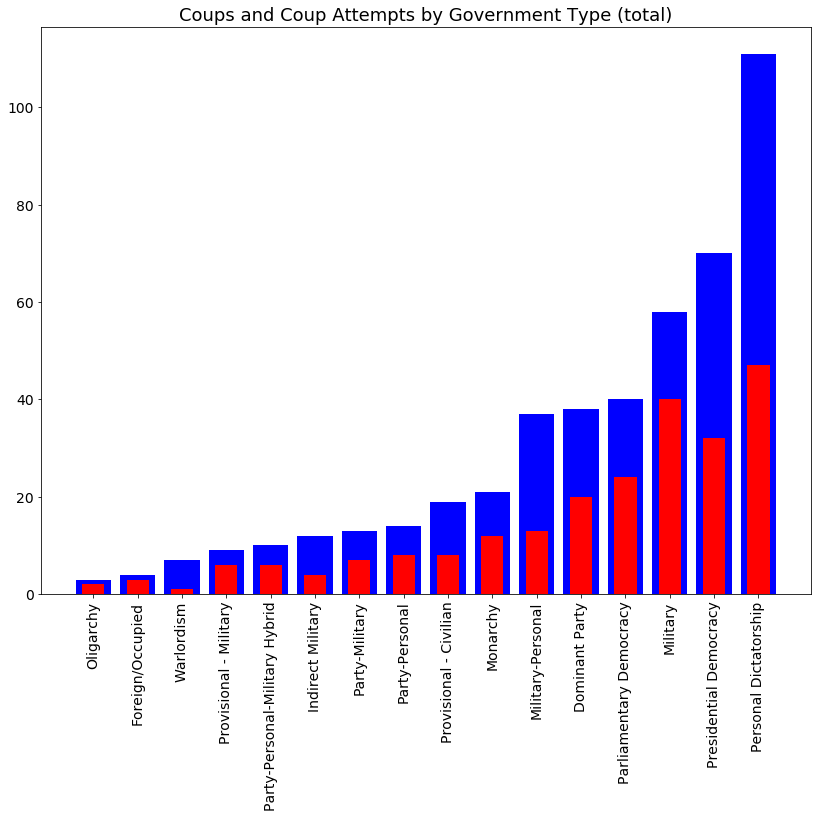

In [13]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.bar(govt_grouped.index.values, govt_grouped['pt_attempt'], color = 'blue')
ax.bar(govt_grouped.index.values, govt_grouped['pt_suc'], color = 'red', width = .5)
# N = len(attempted_coups_govtype.index)
plt.yticks(rotation=0, fontsize = 14)
plt.xticks(rotation=90, fontsize = 14)
# ticklocations = np.arange(0,N)
# ax.set_xticks(ticks = ticklocations -1)
ax.set_title('Coups and Coup Attempts by Government Type (total)', fontsize = 18)
plt.tight_layout(pad=3, h_pad=None, w_pad=None, rect=None)
fig.savefig('../images/coupsbygovttotal.png')

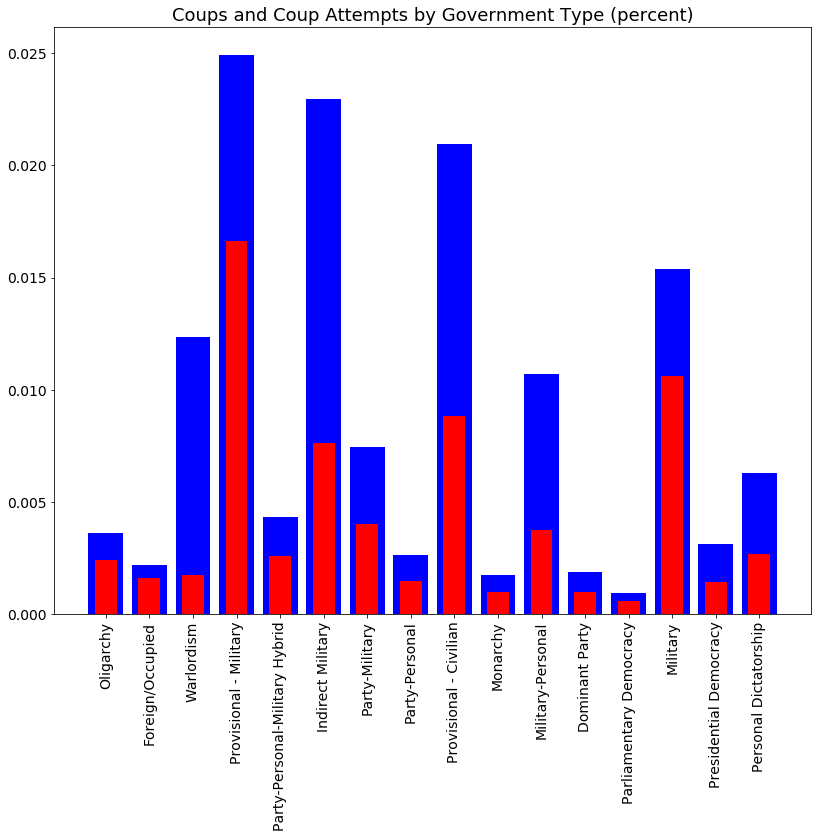

In [14]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.bar(govt_grouped.index.values, govt_grouped['pt_attempt_percent'], color = 'blue')
ax.bar(govt_grouped.index.values, govt_grouped['pt_suc_percent'], color = 'red', width = .5)
# N = len(attempted_coups_govtype.index)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(rotation=0, fontsize = 14)
plt.tight_layout(pad=3, h_pad=None, w_pad=None, rect=None)
# ticklocations = np.arange(0,N)
# ax.set_xticks(ticks = ticklocations -1)
ax.set_title('Coups and Coup Attempts by Government Type (percent)', fontsize = 18)
fig.savefig('../images/coupsbygovtpercent.png')

In [31]:
joint_df['tenure_years'] = joint_df['tenure_months']//12
attempted_coups_tenure = joint_df.groupby('tenure_years').sum()['pt_attempt'].sort_index()
suc_coups_tenure = joint_df.groupby('tenure_years').sum()['pt_suc'].sort_index()

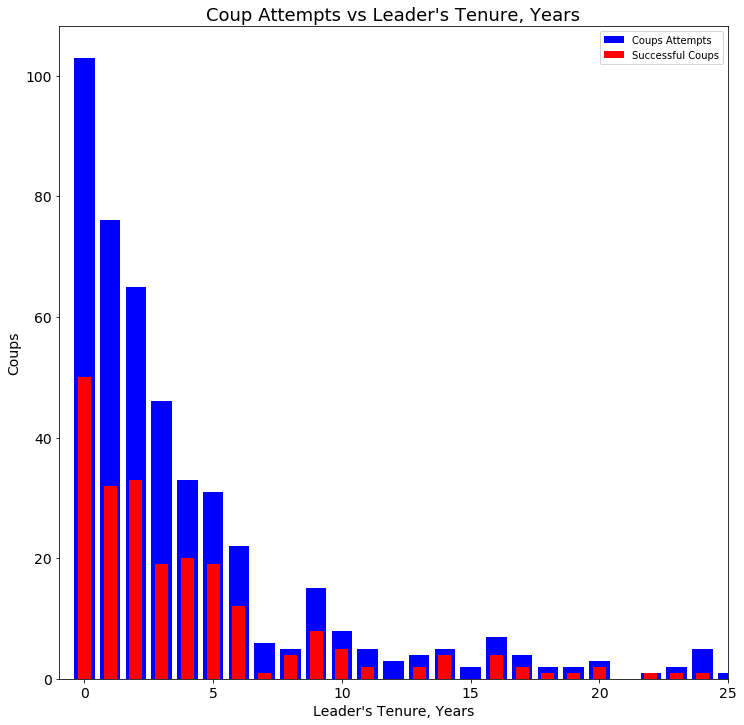

In [53]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.bar(attempted_coups_tenure.index, attempted_coups_tenure, color = 'blue', label = 'Coups Attempts')
ax.bar(attempted_coups_tenure.index, suc_coups_tenure, color = 'red', width = .5, label = 'Successful Coups')
# N = len(attempted_coups_govtype.index)
plt.xticks(rotation=0, fontsize = 14)
plt.yticks(rotation=0, fontsize = 14)
# ticklocations = np.arange(0,N)
# ax.set_xticks(ticks = ticklocations -1)
ax.set_xlim(-1, 25)
ax.set_title("Coup Attempts vs Leader's Tenure, Years", fontsize = 18)
ax.legend(loc = 'best')
ax.set_ylabel('Coups', fontsize = 14)
ax.set_xlabel("Leader's Tenure, Years", fontsize = 14)
fig.savefig('../images/coupsbyleadertenure.png')

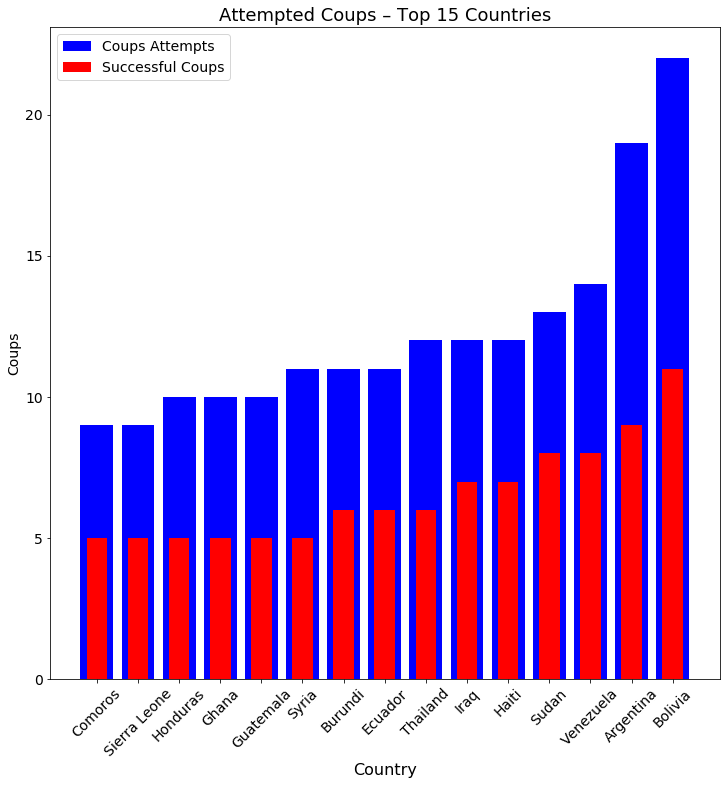

In [49]:
num_ = 15

fig, ax = plt.subplots(figsize = (12, 12))
ax.bar(attempted_coups_bycountry.index[-num_:], attempted_coups_bycountry[-num_:], color = 'blue', label = 'Coups Attempts')
ax.bar(attempted_coups_bycountry.index[-num_:], suc_coups_bycountry[-num_:], color = 'red', width = .5, label = 'Successful Coups')
# N = len(attempted_coups_govtype.index)
plt.xticks(rotation=45, Fontsize = 14)
plt.yticks(rotation=0, fontsize = 14)
# ticklocations = np.arange(0,N)
# ax.set_xticks(ticks = ticklocations -1)
ax.set_title("Attempted Coups – Top 15 Countries", fontsize = 18)
ax.legend(loc = 'best', fontsize = 14)
ax.set_ylabel('Coups', fontsize = 14)
ax.set_xlabel("Country", fontsize = 16)
fig.savefig('../images/coupsbycountry.png')

In [37]:
yearly_df = joint_df.groupby('year').sum()

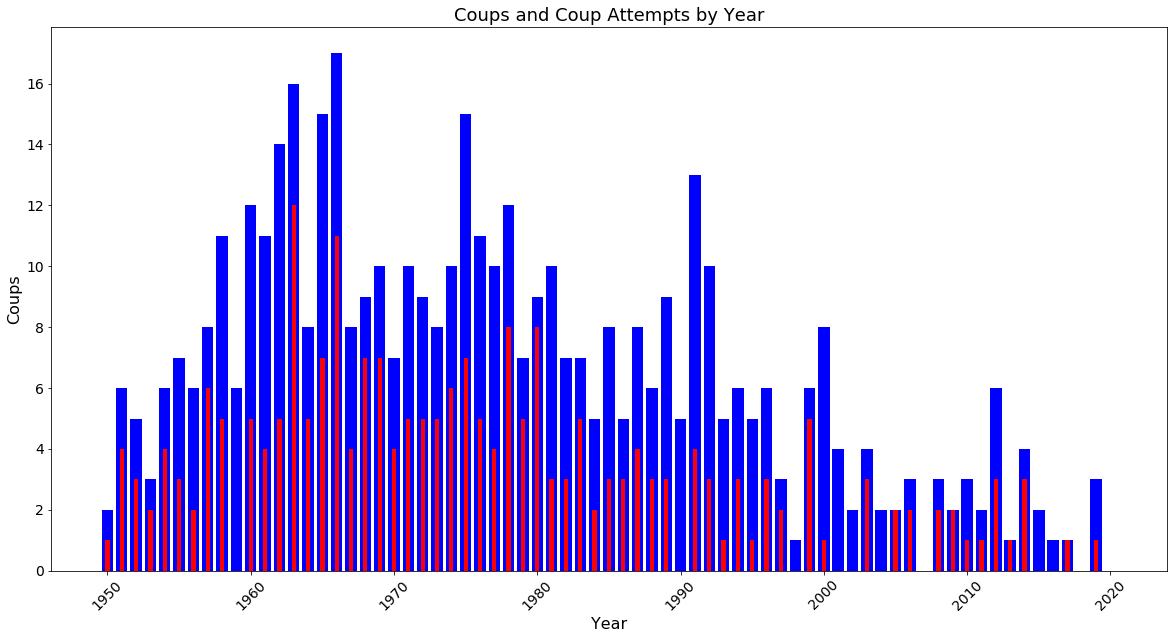

In [62]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(yearly_df.index.values, yearly_df['pt_attempt'], color = 'blue')
ax.bar(yearly_df.index.values, yearly_df['pt_suc'], color = 'red', width = .3)
# N = len(attempted_coups_govtype.index)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(rotation=0, fontsize = 14)
ax.set_ylabel('Coups', fontsize = 16)
ax.set_xlabel("Year", fontsize = 16)

# ticklocations = np.arange(0,N)

ax.set_title('Coups and Coup Attempts by Year', fontsize = 18)
fig.savefig('../images/coupsyearly.png')

In [17]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

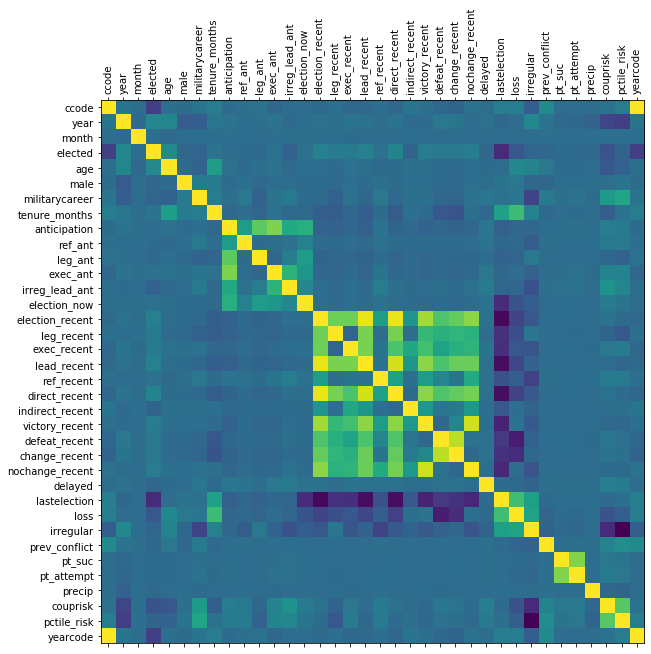

In [18]:
plot_corr(joint_df)

In [36]:
joint_df

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,...,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk,yearcode,tenure_years
0,2.0,USA,Truman,1950.0,1.0,1.0,66.0,1,0.0,58.0,...,5.327876,7.565793,0.0,0.0,0.0,-0.069058,NaN,NaN,21950.0,4.0
1,2.0,USA,Truman,1950.0,2.0,1.0,66.0,1,0.0,59.0,...,5.332719,7.566311,0.0,0.0,0.0,-0.113721,NaN,NaN,21950.0,4.0
2,2.0,USA,Truman,1950.0,3.0,1.0,66.0,1,0.0,60.0,...,5.337538,7.566829,0.0,0.0,0.0,-0.108042,NaN,NaN,21950.0,5.0
3,2.0,USA,Truman,1950.0,4.0,1.0,66.0,1,0.0,61.0,...,5.342334,7.567346,0.0,0.0,0.0,-0.032123,NaN,NaN,21950.0,5.0
4,2.0,USA,Truman,1950.0,5.0,1.0,66.0,1,0.0,62.0,...,5.347107,7.567863,0.0,0.0,0.0,-0.123601,NaN,NaN,21950.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135632,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,1.0,1.0,75.0,1,0.0,254.0,...,5.950643,6.548219,0.0,0.0,0.0,-0.034972,0.000216,0.098266,9902020.0,21.0
135633,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,2.0,1.0,75.0,1,0.0,255.0,...,5.953243,6.549651,0.0,0.0,0.0,0.111192,0.000216,0.098759,9902020.0,21.0
135634,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,3.0,1.0,75.0,1,0.0,256.0,...,5.955837,6.551080,0.0,0.0,0.0,0.209402,0.000214,0.096315,9902020.0,21.0
135635,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,4.0,1.0,75.0,1,0.0,257.0,...,5.958425,6.552508,0.0,0.0,0.0,0.182712,0.000216,0.098317,9902020.0,21.0
